# Práctica 2: Enfermedad Cardiovascular

Esta es la segunda práctica de la asignatura de **Análisis de Datos** del grado de *Ingeniería Informática* de la *UC3M* durante el curso 2020/21.


Autores:  
***Alba Reinders Sánchez***, 100383444, gr.83  
***Alejandro Valverde Mahou***, 100383383, gr.83

![](./images/img.jpg)

El objetivo de esta práctica es predecir si un paciente tiene o no una enfermedad cardiovascular. Se trata de un *problema de clasificación* con salida es binaria. 

Este sistema se quiere usar como ayuda al diagnóstico médico, por lo que es muy importante que el modelo tenga capacidad explicativa y su interpretación debe poder determinar qué atributos son más relevante para el diagnóstico.

El conjunto de datos está compuesto por **70000** ejemplos (pacientes), cada uno con **11** atributos. Más la clase a predecir.

## Tarea 1: Entrenamiento y evaluación de un árbol de decisión

Dado que se requiere de una capacidad explicatica, se plantea usar un **árbol de decisión**, usando, en este primer acercamiento, todas las variables disponibles.

### Carga de los datos

Antes de poder entrenar el modelo, es necesario cargar los datos del fichero.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("cardio_train.csv", sep=';')
header = data.columns
display(data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Crear el modelo

Una vez se tienen los datos, ya se puede crear el modelo.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dtc = DecisionTreeClassifier()

### Entrenar el modelo

Es importante eliminar la columna ***id*** porque representa un valor que es único para cada paciente. Esto, si se introduce en los modelos, puede impedir que realicen clasificaciones generalizables, y puede que aprendan incorrectamente.

Por ejemplo, un árbol de decisión podría determinar que un modelo es muy bueno porque afirma:
```
SI id=1 ENTONCES 
    cardio=1

SI id=2 ENTONCES 
    cardio=1

...
```

Lo cual se corresponde correctamente con sus datos. Pero si se inserta un paciente con un *id* desconocido no sabría clasificarlo.

In [5]:
X = data[header[1:-1]] #Se quita, ademas de la clase, el id
y = data[header[-1]]
dtc.fit(X, y)

DecisionTreeClassifier()

### Evaluar el modelo

Para evaluar el modelo se va a usar la **matriz de confusión** y, usando los valores que proporcione, se van a calcular:

 * **Tasa de aciertos**
 * **Precisión**
 * **Sensibilidad**
 * **Tasa de falsos positivos**
 * **Especificidad**
 * **Puntuación F1**
 * **Área bajo de la curva ROC**

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
y_pred = dtc.predict(X)

In [8]:
def confusionMatrix(y, y_pred):
    true_matrix = ['Real Enfermedad', 'Real No Enfermedad']
    pred_matrix = ['Predicho Enfermedad', 'Predicho No Enfermedad']

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    return pd.DataFrame([[tp, fp], [fn, tn]], columns=true_matrix, index=pred_matrix)

In [9]:
matrix = confusionMatrix(y, y_pred)
display(matrix)

,Real Enfermedad,Real No Enfermedad
Predicho Enfermedad,34962,0
Predicho No Enfermedad,17,35021


Este árbol no consigue una clasificación perfecta a pesar de estar siendo evaluado sobre el conjunto de entrenamiento. Esto se debe a que seguramente haya datos incoherentes, por lo que el modelo los clasifica en la misma clase aunque no pertenezcan a ella, tal y como se ve en la matriz de confusión. Hay 17 pacientes a los que se predice como que no tienen la enfermedad incorrectamente.

Esto no indica que este árbol haya generado un buen clasificador, porque no se ha evaluado con ejemplos desconocidos para el modelo.

Aún así, se va a proceder a evaluar este modelo con las métricas mencionadas anteriormente, para poder realizar una explicación en mayor profundidad de las mismas, aunque sus valores no aporten demasiada información.

#### Tasa de aciertos

También llamada *accuracy*, y mide el porcentaje de instancias **correctamente clasificadas**. Aporta una visión general de como de bueno es el modelo desde una perspectiva general.

$\displaystyle accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
def accuracy(y, y_pred):
    return accuracy_score(y, y_pred) * 100

In [12]:
acc = accuracy(y, y_pred)
print("Se clasifican correctamente un " + str(acc) + "% de las instancias")

Se clasifican correctamente un 99.97571428571429% de las instancias


#### Precisión

Identifica que porcentaje de instancias clasificadas como positivas, lo **son realmente**. Es útil para conocer la precisión del modelo cuando asegura que una instancia es positiva.

$\displaystyle precision = \frac{TP}{TP + FP}$

In [13]:
from sklearn.metrics import precision_score

In [14]:
def precision(y, y_pred):
    return precision_score(y, y_pred) * 100

In [15]:
prec = precision(y, y_pred)
print("Se clasifican correctamente un " + str(prec) + "% de las instancias positivas")

Se clasifican correctamente un 100.0% de las instancias positivas


#### Sensibilidad

También denominado *recall* o *sensitivity*. Indica qué porcentaje de las instancias positivas son clasificadas **correctamente**. Es útil para conocer la precisión del modelo para determinar que una instancia positiva lo es, o se equivoca.

$\displaystyle recall = \frac{TP}{TP + FN}$

In [16]:
from sklearn.metrics import recall_score

In [17]:
def recall(y, y_pred):
    return recall_score(y, y_pred) * 100

In [18]:
rec = recall(y, y_pred)
print("El modelo acierta un " + str(rec) + "% de las instancias positivas")

El modelo acierta un 99.95139941107522% de las instancias positivas


#### Tasa de falsos positivos

Denominada por sus siglas en inglés *FPR*. Indica qué porcentaje de las instancias negativas son clasificadas **incorrectamente**. Es útil para conocer la precisión del modelo para determinar que una instancia negativa lo es, o se equivoca. 

$\displaystyle FPR = \frac{FP}{FP + TN}$

In [19]:
def FPR(y, ypred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return (fp/(fp + tn)) * 100

In [20]:
fpr = FPR(y, y_pred)
print("El modelo falla un " + str(fpr) + "% de las instancias negativas")

El modelo falla un 0.0% de las instancias negativas


#### Especificidad

Similar al *recall*, pero con el caso de los negativos. Indica qué porcentaje de las instancias negativas son clasificadas **correctamente**. Es útil para conocer la precisión del modelo para determinar que una instancia negativa lo es, o se equivoca.

$\displaystyle specificity = \frac{TN}{TN + FP}$

In [21]:
def specificity(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return (tn/(fp + tn)) * 100

In [22]:
spec = specificity(y, y_pred)
print("El modelo acierta un " + str(spec) + "% de las instancias negativas")

El modelo acierta un 100.0% de las instancias negativas


#### Puntuación F1

Indica un valor que agrega la precisión y *recall* mediante una media armónica. El mejor valor es 1 y el peor, 0

$\displaystyle F1 = 2 \frac{precision · recall}{precision + recall}$

In [23]:
from sklearn.metrics import f1_score

In [24]:
def F1(y, y_pred):
    return f1_score(y, y_pred)

In [25]:
f1 = F1(y, y_pred)
print("La puntuación F1 del modelo es: " + str(f1))

La puntuación F1 del modelo es: 0.999756937990592


#### Área bajo la curva ROC

Hace referencia a la cantidad de instancias bien clasificadas si se va modificando el umbral de la *curva ROC*.

In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

**Curva ROC**

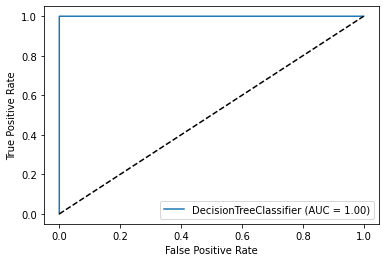

In [28]:
plot_roc_curve(dtc, X, y)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [29]:
def AUROC(y, y_pred):
    return roc_auc_score(y, y_pred) * 100

In [30]:
auroc = AUROC(y, y_pred)
print("El área bajo la curva del modelo es el: " + str(auroc) + "%")

El área bajo la curva del modelo es el: 99.97569970553761%


Para resumir, todas las métricas son:

In [31]:
def evaluation(y, y_pred):
    acc = accuracy(y, y_pred)
    prec = precision(y, y_pred)
    rec = recall(y, y_pred)
    fpr = FPR(y, y_pred)
    spec = specificity(y, y_pred)
    f1 = F1(y, y_pred)
    auroc = AUROC(y, y_pred)

    print("Se clasifican correctamente un " + str(acc) + "% de las instancias")
    print("Se clasifican correctamente un " + str(prec) + "% de las instancias positivas")
    print("El modelo acierta un " + str(rec) + "% de las instancias positivas")
    print("El modelo falla un " + str(fpr) + "% de las instancias negativas")
    print("El modelo acierta un " + str(spec) + "% de las instancias negativas")
    print("La puntuación F1 del modelo es: " + str(f1))
    print("El área bajo la curva del modelo es el: " + str(auroc) + "%")
    
    return acc, prec, rec, fpr, spec, f1, auroc

In [32]:
ev = evaluation(y, y_pred)

Se clasifican correctamente un 99.97571428571429% de las instancias
Se clasifican correctamente un 100.0% de las instancias positivas
El modelo acierta un 99.95139941107522% de las instancias positivas
El modelo falla un 0.0% de las instancias negativas
El modelo acierta un 100.0% de las instancias negativas
La puntuación F1 del modelo es: 0.999756937990592
El área bajo la curva del modelo es el: 99.97569970553761%


## Tarea 2: Inspección del árbol de decisión

Una vez realizado el modelo, hay que entenderlo. Para ello se va a inspeccionar el árbol de clasificación generado, y después se van a responder las siguientes preguntas:

 1. **¿Qué relevancia tienen los exámenes clínicos realizados a la hora de determinar la existencia de una enfermedad cardiovascular?**
 
 2. **¿Es relevante la información (subjetiva) proporcionada por los pacientes a la hora de determinar la presencia de una enfermedad cardiovascular?**

In [33]:
from sklearn import tree
from subprocess import call

In [34]:
print("Profundidad del árbol generado:", dtc.get_depth())

Profundidad del árbol generado: 66


Dada la gran profundidad del árbol, que hace prácticamente imposible visualizarlo correctamente, se ha decidido analizar visualmente exclusivamente los 3 primeros niveles del árbol.

*Si la siguiente celda de código falla correr el comando:* `sudo apt install python-pydot python-pydot-ng graphviz`

In [35]:
tree.export_graphviz(dtc, out_file='tree.dot', feature_names=X.columns, max_depth=3)
call(['dot', '-T', 'png', 'tree.dot', '-o', 'images/tree.png'])

0

El árbol toma la siguiente forma:
![](images/tree.png)

In [36]:
features_importance = pd.DataFrame([header[1:-1], dtc.feature_importances_], index=["", ""])
display(features_importance)

,0,1,2,3,4,5,6,7,8,9,10
,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
,0.32543,0.0195096,0.144683,0.158494,0.23117,0.0408687,0.0329197,0.0176184,0.0087118,0.00829029,0.0123053


### ¿Qué relevancia tienen los exámenes clínicos realizados a la hora de determinar la existencia de una enfermedad cardiovascular?

Las variables que forman parte de los exámenes clínicos son:

 * *ap_hi*
 * *ap_lo*
 * *cholesterol*
 * *gluc*
 
Como se puede apreciar en la imagen anterior, el atributo con mayor relevancia es *ap_hi*. Además, todas las variables del examen clínico se encuentran en los 3 primeros niveles, por lo que se podría afirmar que tienen gran importancia a la hora de determinar si el paciente padece o no de una enfermedad cardiovascular. Esto se debe a que son los atributos que son capaces de dividir de mejor forma al conjunto de datos.

Asimismo, los valores con más importancia para el árbol son tanto *age* como *ap_hi*, por lo que el valor de examen clínico con más importancia sería este atributo, sin despreciar la utilidad de los demas, que también poseen números altos, y se encuentran en las partes altas del árbol.

In [37]:
tree.export_graphviz(dtc, out_file='tree2.dot', feature_names=X.columns, max_depth=4)
call(['dot', '-T', 'png', 'tree2.dot', '-o', 'images/tree2.png'])

0

![](images/tree2.png)

### ¿Es relevante la información (subjetiva) proporcionada por los pacientes a la hora de determinar la presencia de una enfermedad cardiovascular?

Los valores subjetivos son:

 * *smoke*
 * *alco*
 * *active*

Ninguno de los valores subjetivos aparecen en los 3 primeros niveles, pero sí aparecen tanto *active* como *smoke* en el 4º nivel, por lo que se puede afirmar que poseen cierta importancia.

Aún así, el modelo les asigna las 3 importancias más bajas. En orden descendente de relevancia, son: *active*, *alco* y *smoke*.

Esto indica que, dentro de los atributos del estudio, son los menos determinantes.

## Tarea 3: Comparativa de modelos

Dado que el modelo anterior no es de gran utilidad, entre otras cosas, porque no hay división entre conjunto de entrenamiento y de test, se va a realizar esta división usando la técnica de *validación cruzada*, con **7** cruces, por lo que en cada iteración, el conjunto de test contendrá 10000 pacientes.

Además, se va a probar a cambiar los hiperparámetros del árbol, ya que en las tareas anteriores se dejaban con sus valores por defecto, y se van a crear nuevos modelos de clasificación con diferentes algoritmos, con el objetivo de encontrar la configuración del algoritmo que genere una mejor solución del problema.

Los algoritmos de clasificación, con sus hiperparámetros, que se van a probar son:

   * **Árboles de Clasificación**:
    * *criterion*: "gini", "entropy"
    * *splitter*: "best", "random"
    * *max_depth*: None, 5, 10, 20, 50
   * **K-Vecinos Cercanos**:
    * *n_neighbors*: 2, 5, 10, 50
    * *weights*: "uniform", "distance"
   * **Regresión Logística**:
    * *penalty*: "none", "l1", "l2"
    * *C*: 0.5, 1.0, 2.0
   * **Perceptrón Multicapa**:
    * *learning_rate*: "constant", "invscaling", "adaptive"
    * *hidden_layer_sizes*: (), (64,), (64, 64), (64, 64, 64)

Aparte de hacer esta división sobre los datos, se probará a realizar, primero, la evaluación sin ninguna transformación y, después, *normalizando los datos*, para que los valores de las variables se encuentren todos dentro del mismo rango. Esto puede favorecer a los modelos como el *Perceptrón Multicapa* que usan los pesos de los valores para realizar la clasificación.

Esto se hará con el objetivo de estudiar el comportamiento de los modelos sobre los datos con y sin normalización, para encontrar cómo funcionan mejor.

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [40]:
from sklearn.model_selection import KFold

En primer lugar, se va a crear un diccionario para guardar todos los algoritmos de clasificación con sus respectivos hiperparámentros.

In [41]:
classifiers = {
    'Decision Tree': (DecisionTreeClassifier, {
        'criterion': ["gini", "entropy"],
        'splitter': ["best", "random"],
        'max_depth': [None, 5, 10, 20, 50],
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier, {
        'n_neighbors': [2, 5, 10, 50],
        'weights': ["uniform", "distance"],
    }),
    'Logistic Regression': (LogisticRegression, {
        'penalty': ["none", "l1", "l2"],
        'C': [0.5, 1.0, 2.0],
    }),
    'Multilayer Perceptron': (MLPClassifier, {
        'learning_rate': ["constant", "invscaling", "adaptive"],
        'hidden_layer_sizes': [(), (64,), (64, 64), (64, 64, 64)],
    }), 
}

Se va a crear la validación cruzada con 7 hojas.

In [42]:
cv = KFold(n_splits=7, shuffle=True, random_state=0)

#### Bucle Entrenamiento

In [43]:
import itertools
import time

In [44]:
results = []

In [45]:
start_time = time.time()
for fold, (train_index, test_index) in enumerate(cv.split(X.values, y.values)):    
    
    print("Fold:", fold)
    start_fold_time = time.time()
    
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    for name_classifier, info_classifier in classifiers.items():
                
        func_classifier, hyper_classifier = info_classifier
        hyper_keys, hyper_values = hyper_classifier.keys(), hyper_classifier.values()
        
        setups = [dict(zip(hyper_keys, v)) for v in itertools.product(*hyper_values)]
        
        for setup in setups:
            try:
                #**setup 'desenrrolla' el diccionario, de forma que da el nombre y valor del mismo
                classifier = func_classifier(**setup)
                classifier.fit(X_train, y_train)

                y_pred = classifier.predict(X_test)

                setup_string = ""
                for i, j in zip(setup.keys(), setup.values()):
                    setup_string += i[:3] + ":" + str(j) + '; '
                
                
                results.append({
                    'Classifier': name_classifier,
                    'Setup': setup_string,
                    'Fold Number': fold,
                    'Accuracy': accuracy(y_test, y_pred),
                    'Precision': precision(y_test, y_pred),
                    'Recall': recall(y_test, y_pred),
                    'False Positive Rate': FPR(y_test, y_pred),
                    'Specificity': specificity(y_test, y_pred),
                    'F1': F1(y_test, y_pred),
                    'AUROC': AUROC(y_test, y_pred),
                })
            except:
                pass  
    
    print("Fold time:", str(round(time.time() - start_fold_time, 2)))
    
end_time = time.time()

print()
print()

print("It took " + str(round(end_time - start_time, 2)) + " seconds")

Fold: 0
Fold time: 740.15
Fold: 1
Fold time: 661.46
Fold: 2
Fold time: 432.38
Fold: 3
Fold time: 822.98
Fold: 4
Fold time: 347.26
Fold: 5
Fold time: 455.18
Fold: 6
Fold time: 419.06


It took 3878.49 seconds


#### Evaluación

Los resultados se agrupan por *'Classifier'* y por *'Setup'*, lo que genera unm total de **46 modelos** a evaluar.

In [46]:
header_results = ['Classifier', 'Setup', 'Accuracy', 'Precision', 'Recall',
                  'False Positive Rate', 'Specificity', 'F1', 'AUROC']

In [47]:
results_data = pd.DataFrame(results)

results_table = results_data[header_results].groupby(['Classifier', 'Setup']).mean()

A continuación se muestran los 10 mejores modelos según su ***'Accuracy'***.

In [48]:
results_table.sort_values("Accuracy", ascending=False)[:10]

Accuracy  Precision  \
Classifier          Setup                                                   
Decision Tree       cri:gini; spl:best; max:5;       73.164286  75.814456   
                    cri:entropy; spl:best; max:5;    73.114286  75.790637   
                    cri:entropy; spl:best; max:10;   72.747143  74.142207   
                    cri:gini; spl:best; max:10;      72.587143  74.261240   
K-Nearest Neighbors n_n:50; wei:distance;            71.154286  74.033704   
                    n_n:50; wei:uniform;             71.021429  74.781547   
Logistic Regression pen:none; C:0.5;                 69.941429  71.489058   
                    pen:none; C:2.0;                 69.941429  71.489058   
                    pen:none; C:1.0;                 69.941429  71.489058   
                    pen:l2; C:0.5;                   69.891429  71.410495   

                                                        Recall  \
Classifier          Setup                                        
Decision Tree       cri:gini; spl:best; max:5;       67.983344   
                    cri:entropy; spl:best; max:5;    67.876713   
                    cri:entropy; spl:best; max:10;   69.887834   
                    cri:gini; spl:best; max:10;      69.143990   
K-Nearest Neighbors n_n:50; wei:distance;            65.128620   
                    n_n:50; wei:uniform;             63.392184   
Logistic Regression pen:none; C:0.5;                 66.316737   
                    pen:none; C:2.0;                 66.316737   
                    pen:none; C:1.0;                 66.316737   
                    pen:l2; C:0.5;                   66.316211   

                                                     False Positive Rate  \
Classifier          Setup                                                  
Decision Tree       cri:gini; spl:best; max:5;                 21.659819   
                    cri:entropy; spl:best; max:5;              21.654808   
                    cri:entropy; spl:best; max:10;             24.378524   
                    cri:gini; spl:best; max:10;                23.949540   
K-Nearest Neighbors n_n:50; wei:distance;                      22.819217   
                    n_n:50; wei:uniform;                       21.352352   
Logistic Regression pen:none; C:0.5;                           26.420425   
                    pen:none; C:2.0;                           26.420425   
                    pen:none; C:1.0;                           26.420425   
                    pen:l2; C:0.5;                             26.523378   

                                                     Specificity        F1  \
Classifier          Setup                                                    
Decision Tree       cri:gini; spl:best; max:5;         78.340181  0.716832   
                    cri:entropy; spl:best; max:5;      78.345192  0.716132   
                    cri:entropy; spl:best; max:10;     75.621476  0.719238   
                    cri:gini; spl:best; max:10;        76.050460  0.715934   
K-Nearest Neighbors n_n:50; wei:distance;              77.180783  0.692897   
                    n_n:50; wei:uniform;               78.647648  0.686122   
Logistic Regression pen:none; C:0.5;                   73.579575  0.687961   
                    pen:none; C:2.0;                   73.579575  0.687961   
                    pen:none; C:1.0;                   73.579575  0.687961   
                    pen:l2; C:0.5;                     73.476622  0.687606   

                                                         AUROC  
Classifier          Setup                                       
Decision Tree       cri:gini; spl:best; max:5;       73.161762  
                    cri:entropy; spl:best; max:5;    73.110952  
                    cri:entropy; spl:best; max:10;   72.754655  
                    cri:gini; spl:best; max:10;      72.597225  
K-Nearest Neighbors n_n:50; wei:distance;            71.154701  
                    n_n:50; wei

En la tabla se puede ver que los mejores modelos respecto a la tasa de aciertos son *Árboles de Decisión*. Concretamente, el mejor tiene un *criterio* de **gini**, *divide* por el **mejor** y tiene una *profundidad máxima* de **5**.

Dado que se trata de una aplicación médica, no es suficiente con usar esta métrica. Una forma de determinar un buen modelo de diagnóstico, aparte de su tasa de aciertos general, es su sensibilidad, o *recall*.

Esto se debe a que en los diagnósticos médicos es de vital importancia que si un paciente es positivo, se clasifique como tal, ya que es mejor que determine que un paciente sano está enfermo, para que el médico le explore y lo confirme o desmienta, que el modelo determine que un paciente enfermo está sano, lo que podría conllevar problemas serios.


A continuación, se van a mostrar los 10 modelos con mejor ***'Recall'***.

In [49]:
results_table.sort_values("Recall", ascending=False)[:10]

Accuracy  Precision  \
Classifier            Setup                                                    
Multilayer Perceptron lea:adaptive; hid:();             63.431429  60.134473   
                      lea:constant; hid:();             67.337143  68.618189   
                      lea:constant; hid:(64, 64, 64);   64.741429  66.180207   
Decision Tree         cri:entropy; spl:best; max:10;    72.747143  74.142207   
                      cri:gini; spl:best; max:10;       72.587143  74.261240   
                      cri:gini; spl:best; max:5;        73.164286  75.814456   
                      cri:entropy; spl:best; max:5;     73.114286  75.790637   
K-Nearest Neighbors   n_n:10; wei:distance;             69.668571  70.755623   
                      n_n:5; wei:uniform;               68.170000  68.834873   
Logistic Regression   pen:none; C:0.5;                  69.941429  71.489058   

                                                           Recall  \
Classifier            Setup                                         
Multilayer Perceptron lea:adaptive; hid:();             88.009696   
                      lea:constant; hid:();             71.503542   
                      lea:constant; hid:(64, 64, 64);   70.153831   
Decision Tree         cri:entropy; spl:best; max:10;    69.887834   
                      cri:gini; spl:best; max:10;       69.143990   
                      cri:gini; spl:best; max:5;        67.983344   
                      cri:entropy; spl:best; max:5;     67.876713   
K-Nearest Neighbors   n_n:10; wei:distance;             67.007306   
                      n_n:5; wei:uniform;               66.358227   
Logistic Regression   pen:none; C:0.5;                  66.316737   

                                                        False Positive Rate  \
Classifier            Setup                                                   
Multilayer Perceptron lea:adaptive; hid:();                       60.913937   
                      lea:constant; hid:();                       36.524003   
                      lea:constant; hid:(64, 64, 64);             40.291813   
Decision Tree         cri:entropy; spl:best; max:10;              24.378524   
                      cri:gini; spl:best; max:10;                 23.949540   
                      cri:gini; spl:best; max:5;                  21.659819   
                      cri:entropy; spl:best; max:5;               21.654808   
K-Nearest Neighbors   n_n:10; wei:distance;                       27.664161   
                      n_n:5; wei:uniform;                         30.012916   
Logistic Regression   pen:none; C:0.5;                            26.420425   

                                                        Specificity        F1  \
Classifier            Setup                                                     
Multilayer Perceptron lea:adaptive; hid:();               39.086063  0.707293   
                      lea:constant; hid:();               63.475997  0.678990   
                      lea:constant; hid:(64, 64, 64);     59.708187  0.666039   
Decision Tree         cri:entropy; spl:best; max:10;      75.621476  0.719238   
                      cri:gini; spl:best; max:10;         76.050460  0.715934   
                      cri:gini; spl:best; max:5;          78.340181  0.716832   
                      cri:entropy; spl:best; max:5;       78.345192  0.716132   
K-Nearest Neighbors   n_n:10; wei:distance;               72.335839  0.688254   
                      n_n:5; wei:uniform;                 69.987084  0.675683   
Logistic Regression   pen:none; C:0.5;                    73.579575  0.687961   

                                                            AUROC  
Classifier            Setup                                        
Multilayer Perceptron lea:adaptive; hid:();             63.547879  
                      lea:constant; hid:();             67.489770  
                      lea:constant; hid:(64, 64, 64);   64.931009  
Decis

A partir de la tabla, se puede apreciar que respecto a esta métrica, el mejor modelo es el *Perceptrón Multicapa*.  Esto resulta llamativo, porque su tasa de aciertos es bastante baja en comparación con el resto de modelos. La interpretación que se da a este fenómeno es que el modelo ha aprendido a asegurar que un paciente está enfermo practicamente siempre.

A pesar de que no clasificar pacientes enfermos como sanos es un comportamiento deseado, esto puede llegar a ser contraproducente porque, si se clasifica a la mayoría de pacientes como enfermos, el sistema deja de ser de utilidad, ya que hace que todos los pacientes tengan que ser examinados por los médicos para comprobar si se correponde con un *Falso Positivo*.

Por tanto, un buen modelo será aquel que tenga tanto una tasa de aprendizaje alta como una sensibilidad alta. El mejor modelo con el que se cuenta que cumpla estos dos requisitos es: 

***Árbol de Decisión*** con:
 * *criterio* &#8594; entropía
 * *decisión* &#8594; mejor
 * *profundidad máxima* &#8594; 10

***'Accuracy'*** de *72.747143%* y un ***'Recall'*** de *69.887834%*.

### Normalización de los datos

Tras la evaluación anterior, se va a proceder a normalizar los datos para comprobar si se obtienen mejores resultados de esta forma.

In [50]:
norm_data = data.copy()

for column in header:
    min_value = min(norm_data[column])
    max_value = max(norm_data[column])
    norm_data[column] = (norm_data[column] - min_value)/(max_value - min_value)

In [51]:
display(norm_data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.00000,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00001,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1.0
2,0.00002,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1.0
3,0.00003,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1.0
4,0.00004,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.99994,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0,0.0
69996,0.99996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0,1.0
69997,0.99997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0,1.0
69998,0.99999,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0,1.0


#### Bucle Entrenamiento

In [52]:
results_norm = []

In [53]:
X_norm = norm_data[header[1:-1]] #Se tiene que volver a quitar el 'id'
y_norm = norm_data[header[-1]]

In [54]:
start_time = time.time()
for fold, (train_index, test_index) in enumerate(cv.split(X_norm.values, y_norm.values)):    
    
    print("Fold:", fold)
    start_fold_time = time.time()
    
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    for name_classifier, info_classifier in classifiers.items():
                
        func_classifier, hyper_classifier = info_classifier
        hyper_keys, hyper_values = hyper_classifier.keys(), hyper_classifier.values()
        
        setups = [dict(zip(hyper_keys, v)) for v in itertools.product(*hyper_values)]
        
        for setup in setups:
            try:
                #**setup 'desenrrolla' el diccionario, de forma que da el nombre y valor del mismo
                classifier = func_classifier(**setup)
                classifier.fit(X_train, y_train)

                y_pred = classifier.predict(X_test)

                setup_string = ""
                for i, j in zip(setup.keys(), setup.values()):
                    setup_string += i[:3] + ":" + str(j) + '; '
                
                
                results_norm.append({
                    'Classifier': name_classifier,
                    'Setup': setup_string,
                    'Fold Number': fold,
                    'Accuracy': accuracy(y_test, y_pred),
                    'Precision': precision(y_test, y_pred),
                    'Recall': recall(y_test, y_pred),
                    'False Positive Rate': FPR(y_test, y_pred),
                    'Specificity': specificity(y_test, y_pred),
                    'F1': F1(y_test, y_pred),
                    'AUROC': AUROC(y_test, y_pred),
                })
            except:
                pass
                

    print("Fold time:", str(round(time.time() - start_fold_time, 2)))
    
end_time = time.time()

print()
print()

print("It took " + str(round(end_time - start_time, 2)) + " seconds")

Fold: 0
Fold time: 582.86
Fold: 1
Fold time: 688.51
Fold: 2
Fold time: 644.87
Fold: 3
Fold time: 554.65
Fold: 4
Fold time: 903.58
Fold: 5
Fold time: 541.45
Fold: 6
Fold time: 648.13


It took 4564.07 seconds


#### Evaluación

Se vuelven a tener 46 modelos a evaluar, igual que en el caso anterior.

In [55]:
results_data_norm = pd.DataFrame(results_norm)

results_table_norm = results_data_norm[header_results].groupby(['Classifier', 'Setup']).mean()

A continuación se muestran los 10 mejores modelos, en la primera tabla según su ***'Accuracy'***, y en la segunda según su ***'Recall'***.

In [56]:
results_table_norm.sort_values("Accuracy", ascending=False)[:10]

Accuracy  Precision  \
Classifier          Setup                                                   
Decision Tree       cri:gini; spl:best; max:5;       73.164286  75.814456   
                    cri:entropy; spl:best; max:5;    73.114286  75.790637   
                    cri:entropy; spl:best; max:10;   72.780000  74.172250   
                    cri:gini; spl:best; max:10;      72.575714  74.241515   
K-Nearest Neighbors n_n:50; wei:distance;            71.154286  74.033704   
                    n_n:50; wei:uniform;             71.021429  74.781547   
Logistic Regression pen:none; C:0.5;                 69.941429  71.489058   
                    pen:none; C:2.0;                 69.941429  71.489058   
                    pen:none; C:1.0;                 69.941429  71.489058   
                    pen:l2; C:0.5;                   69.891429  71.410495   

                                                        Recall  \
Classifier          Setup                                        
Decision Tree       cri:gini; spl:best; max:5;       67.983344   
                    cri:entropy; spl:best; max:5;    67.876713   
                    cri:entropy; spl:best; max:10;   69.926957   
                    cri:gini; spl:best; max:10;      69.150081   
K-Nearest Neighbors n_n:50; wei:distance;            65.128620   
                    n_n:50; wei:uniform;             63.392184   
Logistic Regression pen:none; C:0.5;                 66.316737   
                    pen:none; C:2.0;                 66.316737   
                    pen:none; C:1.0;                 66.316737   
                    pen:l2; C:0.5;                   66.316211   

                                                     False Positive Rate  \
Classifier          Setup                                                  
Decision Tree       cri:gini; spl:best; max:5;                 21.659819   
                    cri:entropy; spl:best; max:5;              21.654808   
                    cri:entropy; spl:best; max:10;             24.353018   
                    cri:gini; spl:best; max:10;                23.977628   
K-Nearest Neighbors n_n:50; wei:distance;                      22.819217   
                    n_n:50; wei:uniform;                       21.352352   
Logistic Regression pen:none; C:0.5;                           26.420425   
                    pen:none; C:2.0;                           26.420425   
                    pen:none; C:1.0;                           26.420425   
                    pen:l2; C:0.5;                             26.523378   

                                                     Specificity        F1  \
Classifier          Setup                                                    
Decision Tree       cri:gini; spl:best; max:5;         78.340181  0.716832   
                    cri:entropy; spl:best; max:5;      78.345192  0.716132   
                    cri:entropy; spl:best; max:10;     75.646982  0.719601   
                    cri:gini; spl:best; max:10;        76.022372  0.715865   
K-Nearest Neighbors n_n:50; wei:distance;              77.180783  0.692897   
                    n_n:50; wei:uniform;               78.647648  0.686122   
Logistic Regression pen:none; C:0.5;                   73.579575  0.687961   
                    pen:none; C:2.0;                   73.579575  0.687961   
                    pen:none; C:1.0;                   73.579575  0.687961   
                    pen:l2; C:0.5;                     73.476622  0.687606   

                                                         AUROC  
Classifier          Setup                                       
Decision Tree       cri:gini; spl:best; max:5;       73.161762  
                    cri:entropy; spl:best; max:5;    73.110952  
                    cri:entropy; spl:best; max:10;   72.786969  
                    cri:gini; spl:best; max:10;      72.586226  
K-Nearest Neighbors n_n:50; wei:distance;            71.154701  
                    n_n:50; wei

In [57]:
results_table_norm.sort_values("Recall", ascending=False)[:10]

Accuracy  Precision  \
Classifier            Setup                                                   
Multilayer Perceptron lea:adaptive; hid:(64, 64);      55.231429  54.299570   
                      lea:invscaling; hid:();          64.550000  63.630736   
                      lea:adaptive; hid:(64,);         60.924286  64.755488   
Decision Tree         cri:entropy; spl:best; max:10;   72.780000  74.172250   
Multilayer Perceptron lea:invscaling; hid:(64, 64);    58.910000  64.933339   
Decision Tree         cri:gini; spl:best; max:10;      72.575714  74.241515   
                      cri:gini; spl:best; max:5;       73.164286  75.814456   
                      cri:entropy; spl:best; max:5;    73.114286  75.790637   
K-Nearest Neighbors   n_n:10; wei:distance;            69.668571  70.755623   
                      n_n:5; wei:uniform;              68.170000  68.834873   

                                                          Recall  \
Classifier            Setup                                        
Multilayer Perceptron lea:adaptive; hid:(64, 64);      94.477593   
                      lea:invscaling; hid:();          80.388781   
                      lea:adaptive; hid:(64,);         75.451930   
Decision Tree         cri:entropy; spl:best; max:10;   69.926957   
Multilayer Perceptron lea:invscaling; hid:(64, 64);    69.305497   
Decision Tree         cri:gini; spl:best; max:10;      69.150081   
                      cri:gini; spl:best; max:5;       67.983344   
                      cri:entropy; spl:best; max:5;    67.876713   
K-Nearest Neighbors   n_n:10; wei:distance;            67.007306   
                      n_n:5; wei:uniform;              66.358227   

                                                       False Positive Rate  \
Classifier            Setup                                                  
Multilayer Perceptron lea:adaptive; hid:(64, 64);                84.174100   
                      lea:invscaling; hid:();                    51.388794   
                      lea:adaptive; hid:(64,);                   53.583705   
Decision Tree         cri:entropy; spl:best; max:10;             24.353018   
Multilayer Perceptron lea:invscaling; hid:(64, 64);              51.514218   
Decision Tree         cri:gini; spl:best; max:10;                23.977628   
                      cri:gini; spl:best; max:5;                 21.659819   
                      cri:entropy; spl:best; max:5;              21.654808   
K-Nearest Neighbors   n_n:10; wei:distance;                      27.664161   
                      n_n:5; wei:uniform;                        30.012916   

                                                       Specificity        F1  \
Classifier            Setup                                                    
Multilayer Perceptron lea:adaptive; hid:(64, 64);        15.825900  0.679553   
                      lea:invscaling; hid:();            48.611206  0.687682   
                      lea:adaptive; hid:(64,);           46.416295  0.649646   
Decision Tree         cri:entropy; spl:best; max:10;     75.646982  0.719601   
Multilayer Perceptron lea:invscaling; hid:(64, 64);      48.485782  0.571057   
Decision Tree         cri:gini; spl:best; max:10;        76.022372  0.715865   
                      cri:gini; spl:best; max:5;         78.340181  0.716832   
                      cri:entropy; spl:best; max:5;      78.345192  0.716132   
K-Nearest Neighbors   n_n:10; wei:distance;              72.335839  0.688254   
                      n_n:5; wei:uniform;                69.987084  0.675683   

                                                           AUROC  
Classifier            Setup                                       
Multilayer Perceptron lea:adaptive; hid:(64, 64);      55.151747  
                      lea:invscaling; hid:();          64.499993  
                      lea:adaptive; hid:(64,);         60.934112  
Decision Tree         cri:entropy; spl:best; max:10;   72

Igual que en el caso con datos sin normalizar, los *Árboles de Decisión* son los que mejores resultados obtienen para la tasa de aciertos, y el *Perceptrón Multicapa* para la sensibilidad.

Se esperaba que al normalizar los datos, los modelos basados en redes de neuronas, ya que trabajan con el peso de cada atributo, tuvieran un comportamiento notáblemente mejor, pero no ha sido el caso. Ha aumentado la sensibilidad, pero no la tase de aciertos.

El mejor modelo sigue siendo el mismo que con los datos sin normalizar, con unos resultados casi idénticos. Por tanto, el modelo que se eligiría como candidato es ese.

### Profundización en el mejor modelo

Para visualizar el modelo con mayor claridad, se va a entrenar sobre las primeras **60000** instancias, y evaluar con las **10000** restantes.

In [58]:
X_train, X_test = X.values[:60000], X.values[-10000:]
y_train, y_test = y.values[:60000], y.values[-10000:]

In [59]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10)

In [60]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [61]:
matrix = confusionMatrix(y_test, y_pred)
display(matrix)

,Real Enfermedad,Real No Enfermedad
Predicho Enfermedad,3432,1127
Predicho No Enfermedad,1603,3838


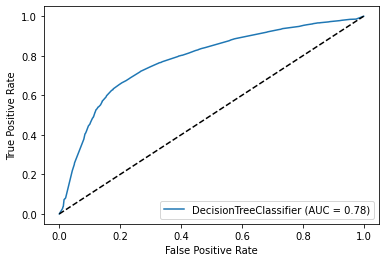

In [62]:
plot_roc_curve(dtc, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [63]:
ev = evaluation(y_test, y_pred)

Se clasifican correctamente un 72.7% de las instancias
Se clasifican correctamente un 75.27966659355123% de las instancias positivas
El modelo acierta un 68.16285998013902% de las instancias positivas
El modelo falla un 22.69889224572004% de las instancias negativas
El modelo acierta un 77.30110775427997% de las instancias negativas
La puntuación F1 del modelo es: 0.7154471544715447
El área bajo la curva del modelo es el: 72.7319838672095%


Como conclusión, el mejor modelo generado no es suficientemente bueno como para generar resultados fiables, pero es un indicador que puede servir de apoyo a la hora de determinar si un paciente sufre o no una enfermedad cardivascular.

## Tarea Extra

En esta tarea se pide realizar un análisis en mayor profundidad con el fin de contestar las preguntas de la tarea 2 sin necesidad de explorar el árbol manualmente, usando análisis estadístico de los mismos.

Lo primero que se va a hacer es un **resumen estadístico** de las variables.

In [64]:
display(data[header[1:]].describe())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Con el resumen generado se puede ver de forma general el aspecto de los datos: como la media de los valores, el mínimo o el máximo, etc. Analizádolos se pueden detectar errores en los valores o la existencia de valores anómalos.

En el caso de *ap_hi* y *ap_lo* se puede observar que la diferencia entre los mínimos con los cuartiles y con los máximos es muy grande. Esto se puede deber a la existencia de valores anómalos.

Ya que la información estadística obtenida sólo sirve como primer acercamiento para conocer la forma de los datos, se van a realizar los **histogramas** de cada variable.

In [65]:
import matplotlib.pyplot as plt

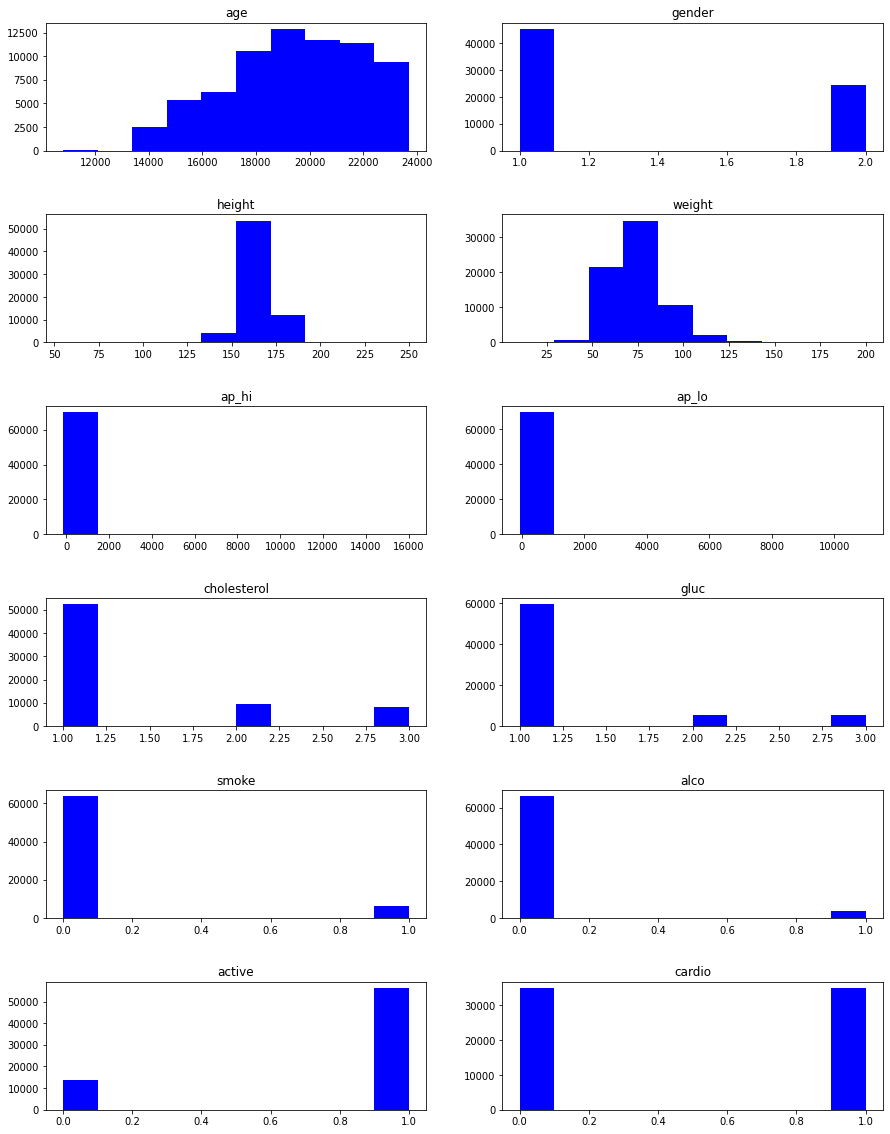

In [66]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.title(header[i+1])
    plt.hist(data[header[i+1]], color='b')
plt.show()

Gracias a los *histogramas* se puede ver la distribución de cada variable por separado, con esto se tiene una idea de la estructura de los datos.

Por ejemplo, se puede ver con la variable *age* que la mayoría de la población se encuentra en el rango de 35 a 65 años y parece que sigue una distribución parecida a la normal.

Por otro lado, tal y como se ha mencionado anteriormente, se puede ver la existencia de datos anómalos en función de las variables *ap_hi* y *ap_lo*, ya que casi la totalidad de la población se encuentra en una única barra.

A pesar de haber obtenido esta información, no resulta de demasiada utilidad para el estudio, por lo que es necesario analizar la **correlación** que tienen respecto a la variable a predecir (*cardio*).

En este caso realizar gráficas de correlación no tiene demasiada relevancia dado que el atributo *cardio* es binario y por tanto las gráficas sólo muestran valores entre 0 y 1 y no se puede intuir la correlación. Por lo que se va a usar exclusivamente mapa de calor usando el **coeficiente de correlación de Pearson**.

In [67]:
from scipy import stats
import numpy as np
import seaborn as sns

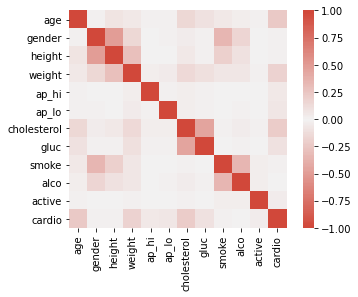

In [68]:
corr = data[header[1:]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(15, 15, n=200),
    square=True
)

De la gráfica anterior, sólo interesa la última fila o columna, ya que es la que compara la variable *cardio* con el resto.

In [69]:
print("Coeficiente de correlación de Pearson de la variable a estudiar con el resto:")

for name in header[1:-1]:
    coef = data[name].corr(data[header[-1]])
    print("\t- " + name + ": " + str(coef)) 

Coeficiente de correlación de Pearson de la variable a estudiar con el resto:
	- age: 0.23815922744232323
	- gender: 0.00810949191312318
	- height: -0.010821058331006024
	- weight: 0.1816595617986211
	- ap_hi: 0.05447505392688467
	- ap_lo: 0.06571869614919743
	- cholesterol: 0.22114727391225064
	- gluc: 0.08930688732435299
	- smoke: -0.015485935661373308
	- alco: -0.007330231723206605
	- active: -0.03565324811518794


A partir de estos resultados se puede concluir que las variables que tienen mayor relación con *cardio*  son:

  * ***age***
  * *cholesterol*
  * *weight*
  
El resto tienen un valor por debajo de **0.1**.

### ¿Qué relevancia tienen los exámenes clínicos realizados a la hora de determinar la existencia de una enfermedad cardiovascular?

Las variables que forman parte de los exámenes clínicos son:

 * *ap_hi*
 * *ap_lo*
 * *cholesterol*
 * *gluc*
 
Como se puede apreciar en la lista del **coeficiente de Pearson**, las variables del examen clínico aportan cierta importancia, pero no son las más determinantes. Siendo la mejor dentro de ellas *cholesterol*, que además es la segunda más relevante del conjunto de atributos, seguida por *gluc*, después *ap_lo* y por último *ap_hi*.

### ¿Es relevante la información (subjetiva) proporcionada por los pacientes a la hora de determinar la presencia de una enfermedad cardiovascular?

Los valores subjetivos son:

 * *smoke*
 * *alco*
 * *active*

Los atributos subjetivos no parecen tener una relevancia significativa. De todo el conjunto de atributos, el que peor correlación presenta es *alco*. Los otros dos atributos presentan una correlación ligeramente mejor, siendo el mejor de los tres *active*, pero ninguno se podría considerar decisivo a la hora de determinar si un paciente padece enfermedades cardiacas.